In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [7]:
import glob
import matplotlib.pyplot as plt
import time
import numpy as np
import video_tools as vt
import cv2  # Internal operations one in BGR
import os
import csv
import pickle

# Sanity check
print("[video_tools]", vt.__file__)
ROOT = '/home/alex/Desktop/Helico/0_Database/RPi_import/'
#TS = '190622_201853'
#TS = '190624_003829'
TS = '190622_202211'
DATA = '_NN_crops/'
PATH_VIDEO = ROOT+TS+'/'
PATH_POSITIVE = PATH_VIDEO+TS+DATA+'nnSizeCrops/'
images = sorted([img for img in glob.glob(PATH_POSITIVE+'*')])  # Glob glob is not deterministic
PATH_EXTRAPOLATED_BBOX = os.path.join(PATH_VIDEO, TS+"_extrapolatedBB.pickle")
PATH_NEGATIVE = PATH_VIDEO+TS+DATA+'Negatives/'
negative_images = sorted([img for img in glob.glob(PATH_NEGATIVE+'*')])

PATH_EXTRACTED = PATH_VIDEO+TS+DATA+'Extracted_helicopters/'
PATH_AUGMENTED = PATH_VIDEO+TS+DATA+'Augmented_data/'
augmented_images = sorted([img for img in glob.glob(PATH_AUGMENTED+'*') if img[-4:] != '.txt'])

EXT = '.png'  # Image saving format

[video_tools] /home/alex/Desktop/Helico/video_tools/__init__.py


In [8]:
PATH_AUGMENTED

'/home/alex/Desktop/Helico/0_Database/RPi_import/190622_202211/190622_202211_NN_crops/Augmented_data/'

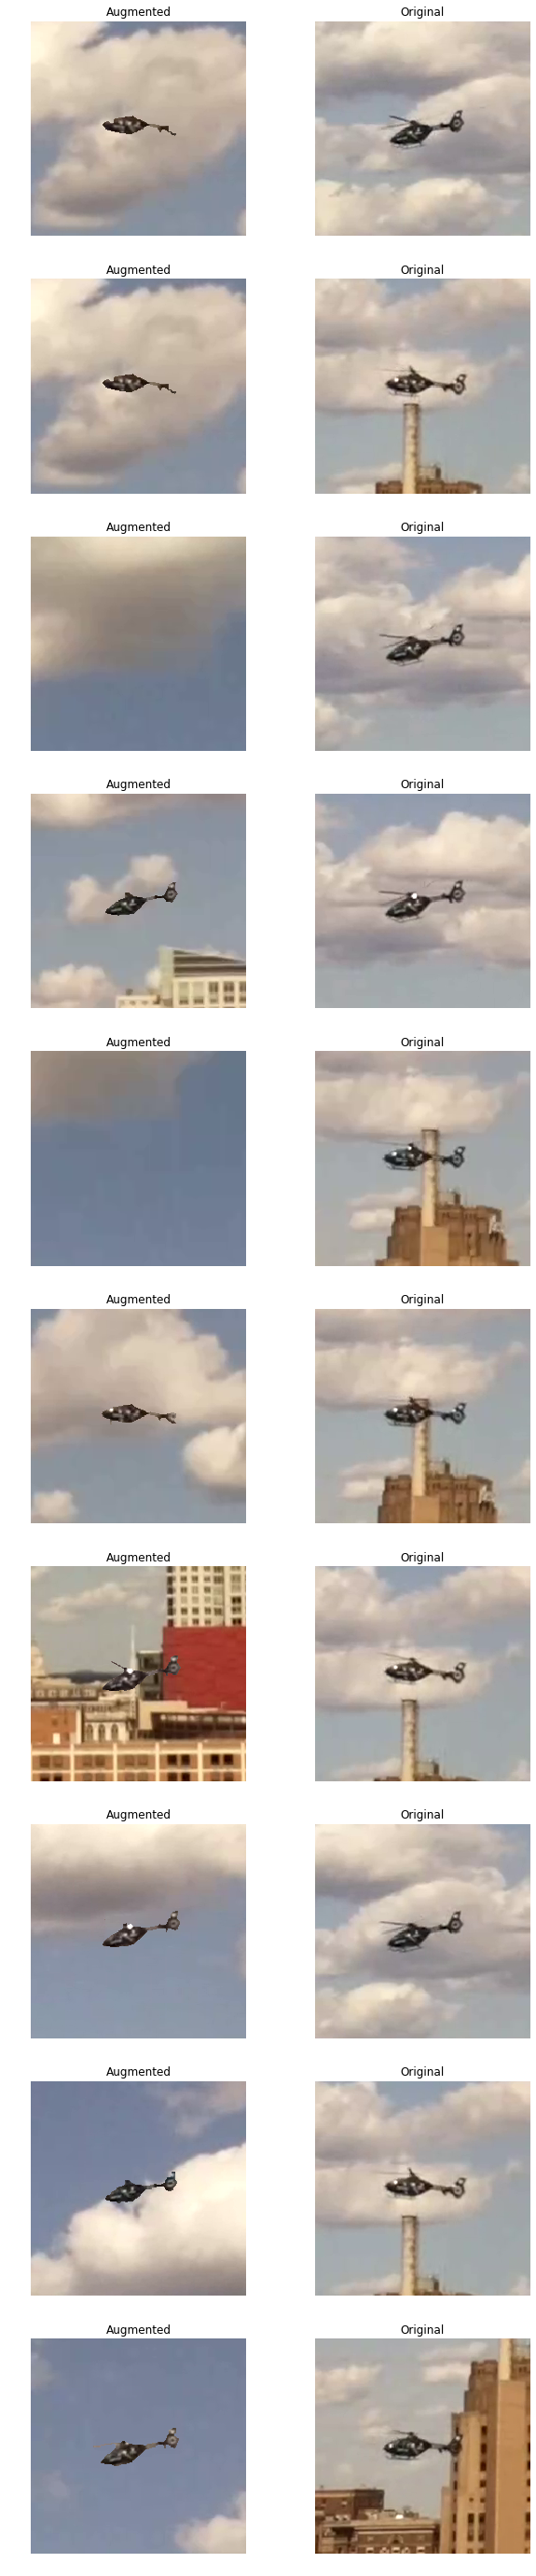

In [12]:
nb_row = 10
nb_col = 2
image_size = 5
fig, axes = plt.subplots(nb_row, nb_col, figsize=(image_size*nb_col, image_size*nb_row))#figsize=(5*nb_row, 5*nb_col))
for i in range(nb_row):
    for j in range(nb_col):
        index = np.random.randint(len(augmented_images)) if j%2==0 else np.random.randint(len(images))
        path = augmented_images[index] if j%2==0 else images[index]
        title = "Augmented" if j%2==0 else "Original"
        img = plt.imread(path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        axes[i, j].set_title(title)